# Resize image smaller and to squares

Smaller images are easier and faster to train.
Squares are better supported than rectangle in fastai library.

In [1]:
import fastai
from fastai import *
from fastai.vision import *
from fastai.callback import *

In [2]:
!pwd
!ls ./data/ -l

/home/jupyter/humpback
total 2284
-rw-r--r-- 1 jupyter jupyter 509449 Dec  5 04:03 sample_submission.csv
drwxr-xr-x 3 jupyter jupyter 270336 Dec  5 04:20 test
drwxr-xr-x 2 jupyter jupyter 946176 Dec 15 05:39 train
-rw-r--r-- 1 jupyter jupyter 608673 Dec  5 04:03 train.csv


In [3]:
path = Path('./data')
path_train = path/'train'
path_train_96 = path/'train_96'  ## image resized to 96x96 pixel 

In [4]:
il = ImageImageList.from_folder(path_train)

In [5]:
## using PIL functions. 
def resize_one(fn,i):
    dest = path_train_96/fn.relative_to(path_train)  ## extract the image name and save to new folder
    dest.parent.mkdir(parents=True, exist_ok=True)  ## make destination folder if not exist
    img = PIL.Image.open(fn)  ## read the image
    targ_sz = resize_to(img, targ_sz=96, use_min=False)  ## get the w x h for desire size while keeping aspect ratio
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    new_img = PIL.Image.new(mode='RGB', size=(96,96))  ## create a new square image that is all black
    new_img.paste(img, box=((96 - img.size[0])//2, (96 - img.size[1])//2))  ## insert resized image at the center of the new canvas
    new_img.save(dest, quality=60)  ## save the image in destination with filename

## using fastai functions
def resize_tfms(fn, i):
    dest = path_train_96/fn.relative_to(path_train)  ## extract the image name and save to new folder
    dest.parent.mkdir(parents=True, exist_ok=True)  ## make destination folder if not exist
    img = open_image(fn)  ## returns a fastai.vision.image.Image object
    img = img.apply_tfms([crop_pad()], size = 96, resize_method=ResizeMethod.PAD, padding_mode='zeros')  ## resize the image to 96x96 with paddings of zeros
    img.save(dest)

In [6]:
#parallel(resize_one, il.items[:100])
parallel(resize_tfms, il.items)

## Note, you do not need to delete the train_96 to repeat. Saving will overwrite images with same name

In [7]:
original = PIL.Image.open(Path('./data/train/e0df64b85.jpg'))
small_96 = PIL.Image.open(Path('./data/train_96/e0df64b85.jpg'))
print(f'Original size is: {original.size}')
print(f'Original size is: {small_96.size}')

Original size is: (1050, 525)
Original size is: (96, 96)


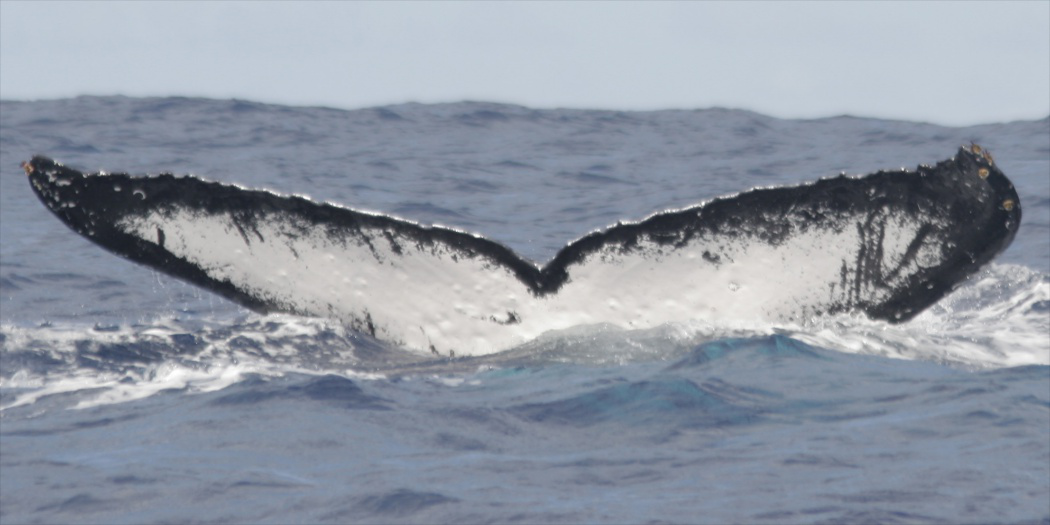

In [8]:
original

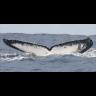

In [9]:
small_96

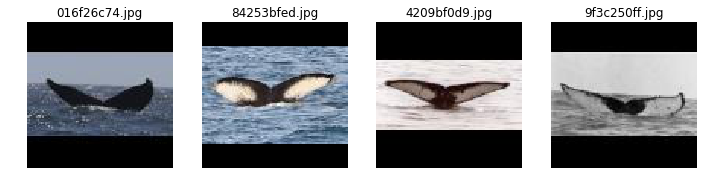

In [10]:
## show a random butch of small images
il_96 = ImageImageList.from_folder(path_train_96)
_, axs = plt.subplots(1,4, figsize = (12,3))
for fn, ax in zip(np.random.choice(il_96.items, replace=False, size=4), axs):
    open_image(fn).show(ax=ax, title=fn.parts[-1])

## Supplement to show how the resizing work

In [11]:
img = PIL.Image.open(Path('./data/train/e0df64b85.jpg'))
print(type(img))
print(f'Original image size: {img.size}')

<class 'PIL.JpegImagePlugin.JpegImageFile'>
Original image size: (1050, 525)


In [12]:
targ_sz = resize_to(img, targ_sz=96, use_min=False)
print(f'New image size: {targ_sz}')

New image size: (96, 48)


(96, 48)


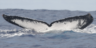

In [13]:
img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
print(img.size)
img

(96, 96)


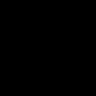

In [14]:
new_img = PIL.Image.new('RGB', (96, 96))
print(new_img.size)
new_img

(96, 96)


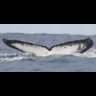

In [15]:
new_img.paste(img, ((96 - img.size[0])//2, (96 - img.size[1])//2))
print(new_img.size)
new_img